# UAS
### Notebook ini untuk preprocessing dataset (cleaning, transformation, dll) dari UTS, dan nanti datanya akan digunakan untuk training MLP
### Perbandingan preprocessing menggunakan model Machine Learning biasa.

In [3]:
import pandas as pd

## Read Dataset
#### Karena row pertama di dataset bukan nama column, melainkan langsung ke data pertama, maka kita akan menambahkan header untuk nama column

In [4]:
path = 'RegresiUTSTelkom.csv'
df = pd.read_csv(path, header=None)
num_cols = len(df.columns)
new_cols = ['target'] + ['x' + str(i) for i in range(1, num_cols)]
df.columns = new_cols


In [5]:
df

,target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


## Cek data yang kosong

In [6]:
df.isnull().sum()


target    0
x1        0
x2        0
x3        0
x4        0
         ..
x86       0
x87       0
x88       0
x89       0
x90       0
Length: 91, dtype: int64

#### Sepertinya tidak ada data yang kosong, maka lanjut

### Train model sebelum preprocessing
#### Kita akan lakukan training model sebelum preprocessing agar ada perbandingan setelah preprocessing (baseline)

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, xgb_pred)
rmse = root_mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")


RMSE: 8.956937789916992
R2: 0.325910747051239


In [8]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = root_mean_squared_error(y_test, linreg_pred)
r2 = r2_score(y_test, linreg_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.523312054048366
R2: 0.23796616215080735


R2 yang didapat ~0.325, kurang bagus. Model Linear Regression lebih buruk di 0.23

### Preprocessing: Seleksi Fitur

#### 1. Seleksi Multicolinearity
#### Kita akan menghilangkan fitur yang memiliki korelasi tinggi dengan fitur lain (selain target). Hal ini dilakukan karena jika dua fitur memiliki korelasi kuat (kuat negatif atau kuat positif), fitur tersebut mungkin sama atau mirip.

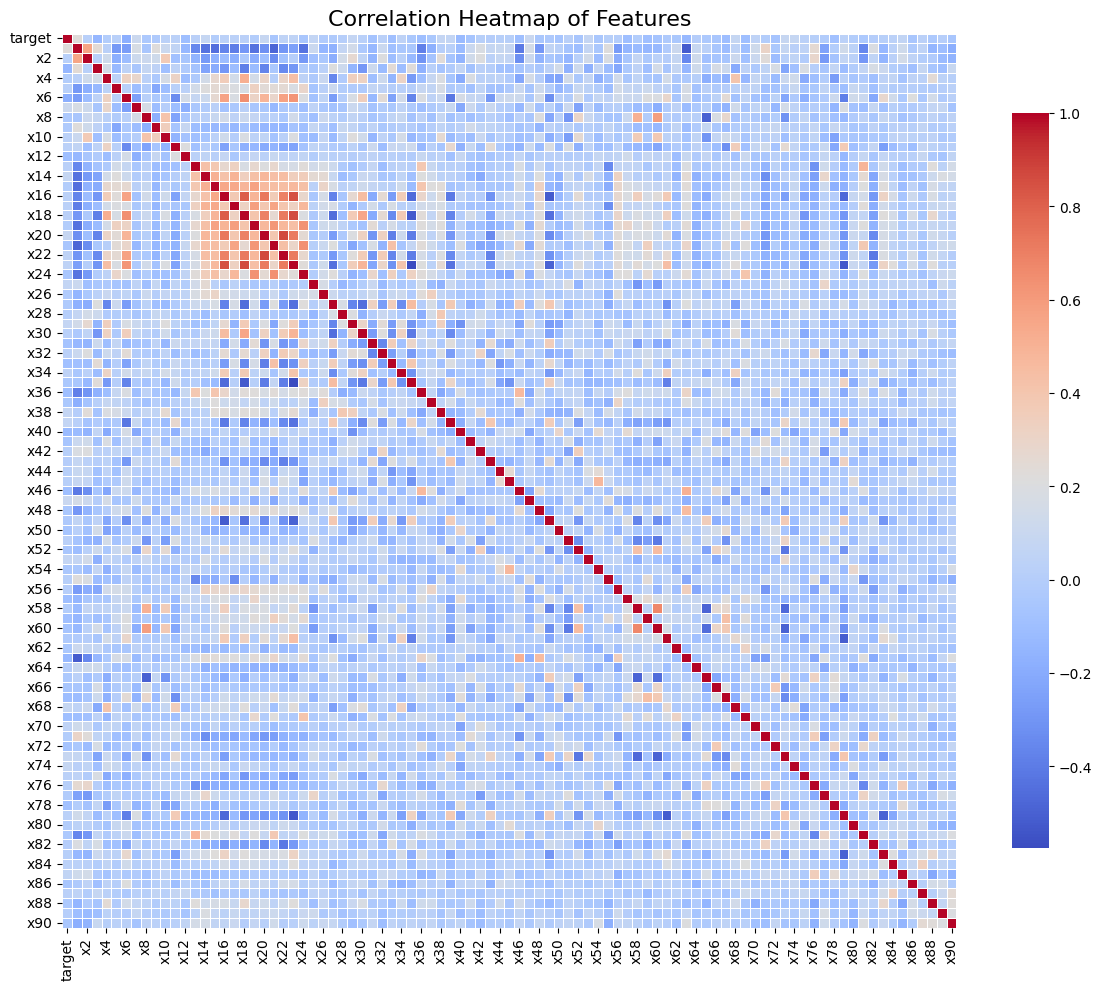

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Features', fontsize=16)

plt.tight_layout()

plt.show()


In [10]:
import numpy as np

In [11]:
df_1 = df.copy()

corr_matrix = df_1.corr()

mask = np.ones(corr_matrix.shape, dtype=bool)
np.fill_diagonal(mask, False) 
mask[:, 0] = False  
mask[0, :] = False

upper_threshold = 0.7
lower_threshold = -0.7
features_to_drop = []
correlation_values = {}
correlated_pairs = {}

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if mask[i, j] and (corr_matrix.iloc[i, j] > upper_threshold or corr_matrix.iloc[i, j] < lower_threshold):
        
            col_i = corr_matrix.columns[i]
            col_j = corr_matrix.columns[j]
            
            if col_i not in features_to_drop and col_j not in features_to_drop:
    
                if abs(corr_matrix[col_i]).mean() > abs(corr_matrix[col_j]).mean():
                    features_to_drop.append(col_i)
                    correlation_values[col_i] = corr_matrix.iloc[i, j]
                    correlated_pairs[col_i] = col_j
                else:
                    features_to_drop.append(col_j)
                    correlation_values[col_j] = corr_matrix.iloc[i, j]
                    correlated_pairs[col_j] = col_i

df_1 = df_1.drop(columns=features_to_drop)
print(f"Dropped {len(features_to_drop)} features due to high correlation")
print(f"Remaining features: {df_1.shape[1]}")

print("\nDropped features and their correlation values:")
for feature, corr_value in correlation_values.items():
    print(f"- {feature}: {corr_value:.4f} (highly correlated with {correlated_pairs[feature]})")


Dropped 4 features due to high correlation
Remaining features: 87

Dropped features and their correlation values:
- x16: 0.8096 (highly correlated with x18)
- x18: 0.7170 (highly correlated with x22)
- x20: 0.8657 (highly correlated with x22)
- x23: 0.7168 (highly correlated with x22)


Disini kita menghilangkan 4 fitur karena korelasi yang kuat dengan fitur lain.

Kita akan coba train model lagi dengan data baru

In [12]:
X = df_1.drop(columns=['target'])
y = df_1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = root_mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 8.984336853027344
R2: 0.3217804431915283


In [13]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = root_mean_squared_error(y_test, linreg_pred)
r2 = r2_score(y_test, linreg_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.555206054765849
R2: 0.23285344385631512


Sepertinya setelah proses seleksi multicolinearity, hasil semakin buruk di kedua model, maka kita akan coba teknik lain.

#### 2. ANOVA

In [14]:
from sklearn.feature_selection import f_regression, SelectKBest

# Best practice: Apply feature selection only on training data
# to prevent data leakage
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ANOVA feature selection on training data only
selector = SelectKBest(score_func=f_regression, k=30)
selector.fit(X_train, y_train)
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices].tolist()
feature_scores = selector.scores_

# Create a new dataframe with only selected features
# Note: We're only using the selected features for both train and test sets
df_2 = df[selected_features + ['target']]

print(f"Selected {len(selected_features)} top features using ANOVA")
print("Selected features with scores:")
for i, feature in enumerate(selected_features):
    print(f"- {feature}: {feature_scores[selected_indices[i]]:.5f}")

print(f"\nShape of new dataframe: {df_2.shape}")


Selected 30 top features using ANOVA
Selected features with scores:
- x1: 21925.12781
- x3: 8109.94945
- x6: 15102.49567
- x7: 5019.05930
- x12: 3941.11939
- x14: 2567.51572
- x20: 3152.36017
- x25: 1707.18258
- x29: 2246.33270
- x31: 2288.03226
- x33: 3440.56981
- x36: 4217.21943
- x38: 2299.28389
- x39: 2048.46346
- x40: 6554.31014
- x46: 4270.84235
- x47: 3892.67898
- x50: 1663.49628
- x53: 2297.78619
- x57: 3945.66684
- x59: 3635.75972
- x60: 1837.98619
- x63: 6658.13629
- x67: 4514.71853
- x68: 2740.37166
- x69: 4158.36643
- x72: 1871.14393
- x73: 2882.37127
- x74: 2792.49128
- x78: 3088.44931

Shape of new dataframe: (515345, 31)


Kita akan coba training lagi dengan data baru

In [15]:
X = df_2.drop(columns=['target'])
y = df_2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = root_mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.350957870483398
R2: 0.2652992606163025


In [16]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = root_mean_squared_error(y_test, linreg_pred)
r2 = r2_score(y_test, linreg_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.933622408689345
R2: 0.17088738774652723


Hasil semakin buruk, kita akan coba teknik lain

#### 3. Feature Importance (dari XGB)

In [17]:
# It's better to perform feature importance after splitting the data
# to avoid data leakage and ensure the test set remains truly unseen
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost on training data only
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame of feature importances
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})
importance_df = importance_df.sort_values('importance', ascending=False)

# Select top 30 features
top_features = importance_df.head(30)['feature'].tolist()

# Create new dataset with only the top features
df_3 = df[top_features + ['target']]


In [18]:
X = df_3.drop(columns=['target'])
y = df_3['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = root_mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.053475379943848
R2: 0.3113018870353699


In [19]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = root_mean_squared_error(y_test, linreg_pred)
r2 = r2_score(y_test, linreg_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.654840354115647
R2: 0.21677161221971086


Hasil lebih baik dibanding ANOVA, namun masih lebih buruk dibanding tidak melakukan seleksi fitur sama sekali. 

### Preprocessing: Transformasi Fitur

#### Transformasi Yeo-Johnson kita gunakan untuk mengurangi skewness pada persebaran data. Robust Scaling kita gunakan untuk menghandal outlier.

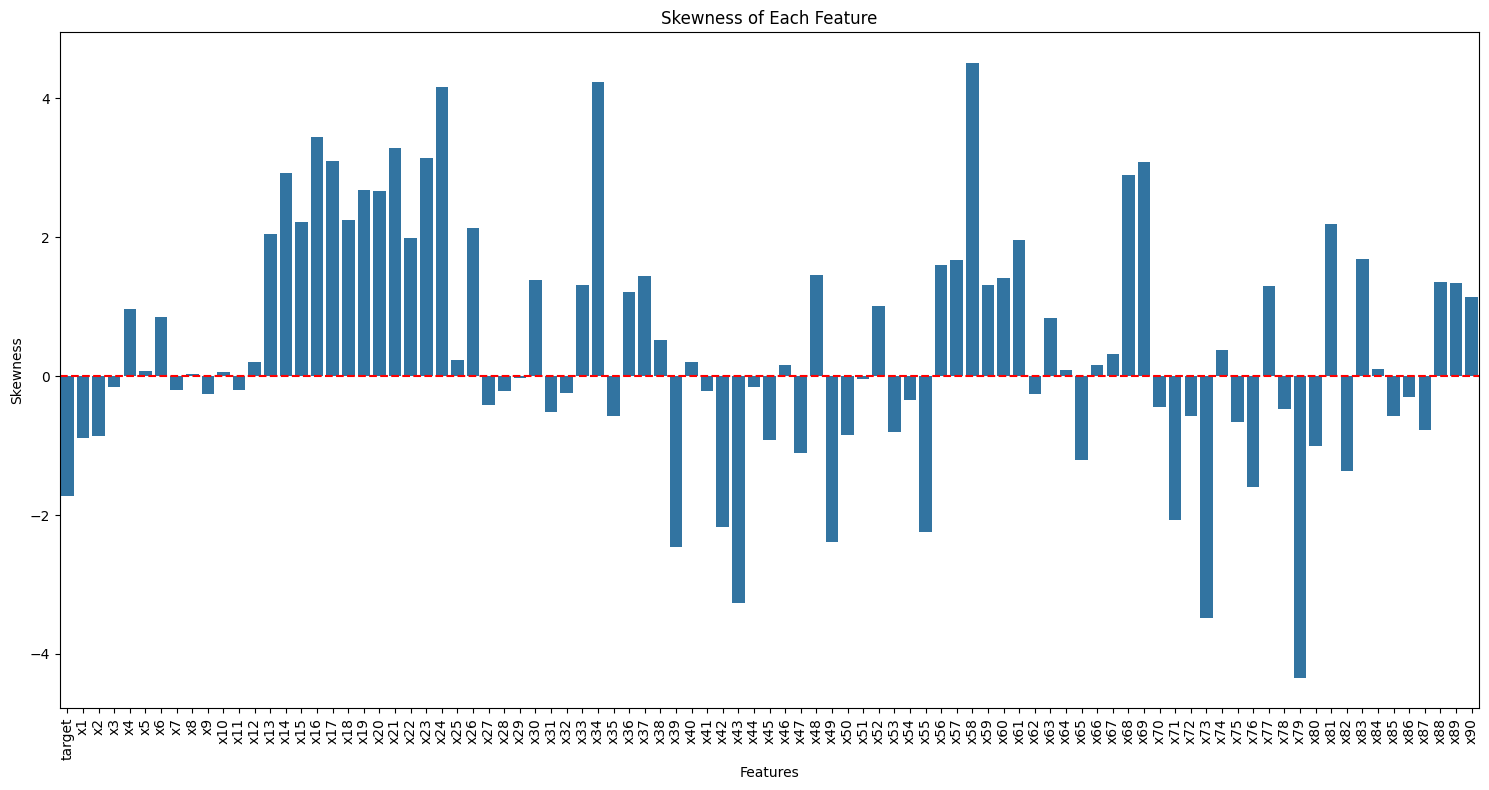

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

skewness = df.skew()

plt.figure(figsize=(15, 8))

sns.barplot(x=skewness.index, y=skewness.values)
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Features')
plt.ylabel('Skewness')
plt.title('Skewness of Each Feature')

plt.tight_layout()
plt.show()


Fitur banyak yang skew, baik arah positif maupun negatif. Oleh karena itu kita transformasi menggunakan Yeo-Johnson yang dapat menghandal skew negatif dan positif.

In [21]:
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd


X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = Pipeline([
    ('yeo_johnson', PowerTransformer(method='yeo-johnson')),
    ('robust_scaler', RobustScaler())
])

preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_df = pd.DataFrame(X_train_transformed, columns=X.columns)
X_train_df['target'] = y_train.values

X_test_df = pd.DataFrame(X_test_transformed, columns=X.columns)
X_test_df['target'] = y_test.values

df_4 = pd.concat([X_train_df, X_test_df], axis=0)

cols = df_4.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_4 = df_4[cols]


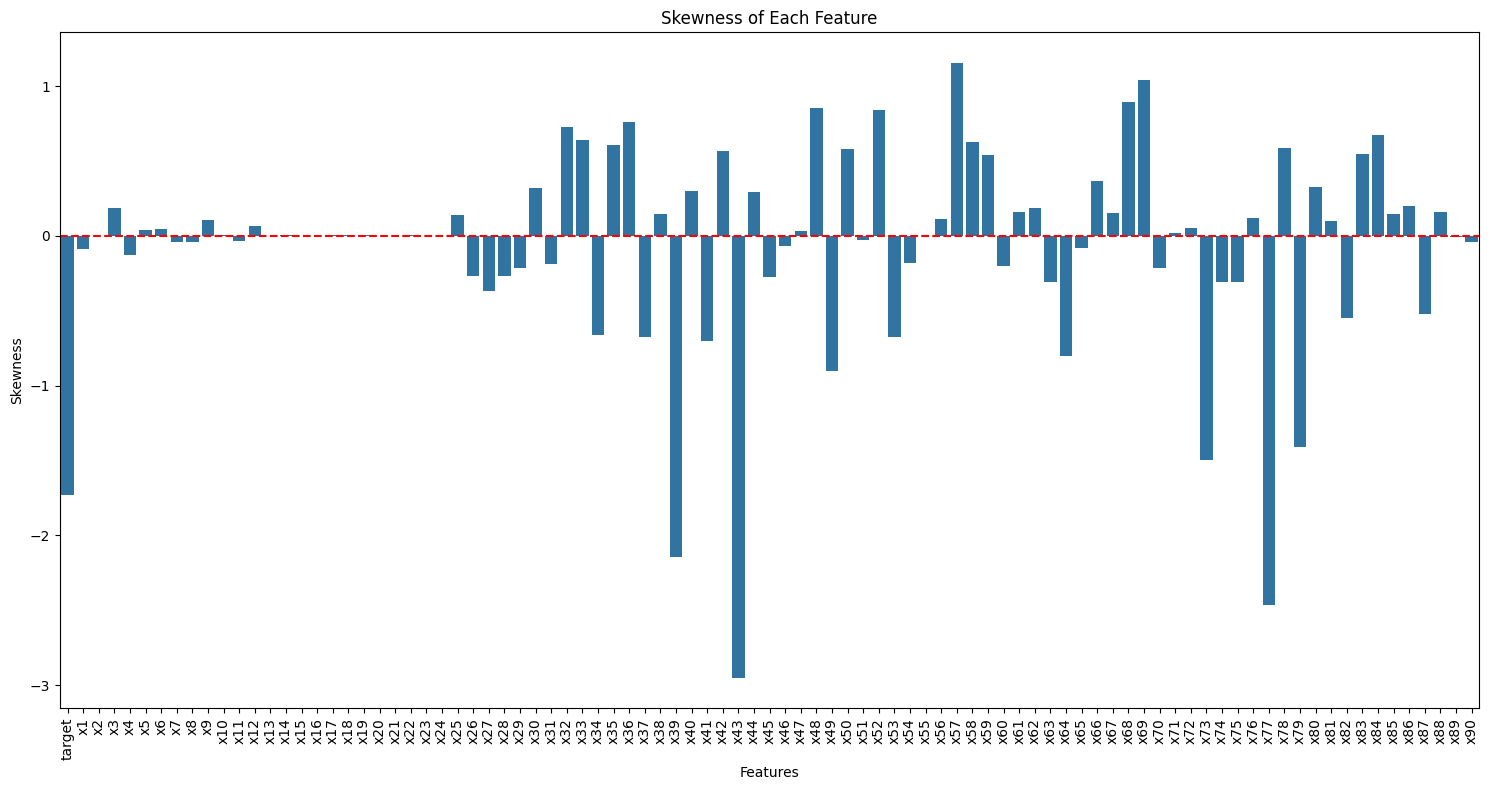

In [22]:
skewness = df_4.skew()

plt.figure(figsize=(15, 8))

sns.barplot(x=skewness.index, y=skewness.values)
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Features')
plt.ylabel('Skewness')
plt.title('Skewness of Each Feature')

plt.tight_layout()
plt.show()

Setelah transformasi, data skew lebih sedikit, dari ada yang nilai skewnya 4, menjadi sebagian besar nilai skewnya dibawah 1.

Kita akan coba train model lagi setelah transformasi.

In [23]:
df_4.to_csv('preprocessed_data.csv', index=False)
print("Preprocessed data exported to 'preprocessed_data.csv'")

Preprocessed data exported to 'preprocessed_data.csv'


In [24]:
X = df_4.drop(columns=['target'])
y = df_4['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = root_mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 8.922174453735352
R2: 0.33320415019989014


In [25]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = root_mean_squared_error(y_test, linreg_pred)
r2 = r2_score(y_test, linreg_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.5160828821042
R2: 0.24147859980098052


### Evaluasi Model Setelah Transformasi

Hasil transformasi menunjukkan sedikit peningkatan performa model:

#### Sebelum transformasi:
- **XGBoost**:
  - RMSE: 8.956937789916992
  - R²: 0.325910747051239
- **Linear Regression**:
  - RMSE: 9.523312054048366
  - R²: 0.23796616215080735

#### Setelah transformasi:
- **XGBoost**:
  - RMSE: 8.922174453735352
  - R²: 0.33320415019989014
- **Linear Regression**:
  - RMSE: 9.5160828821042
  - R²: 0.24147859980098052

Transformasi memberikan peningkatan kecil pada model XGBoost dan LinearRegression.

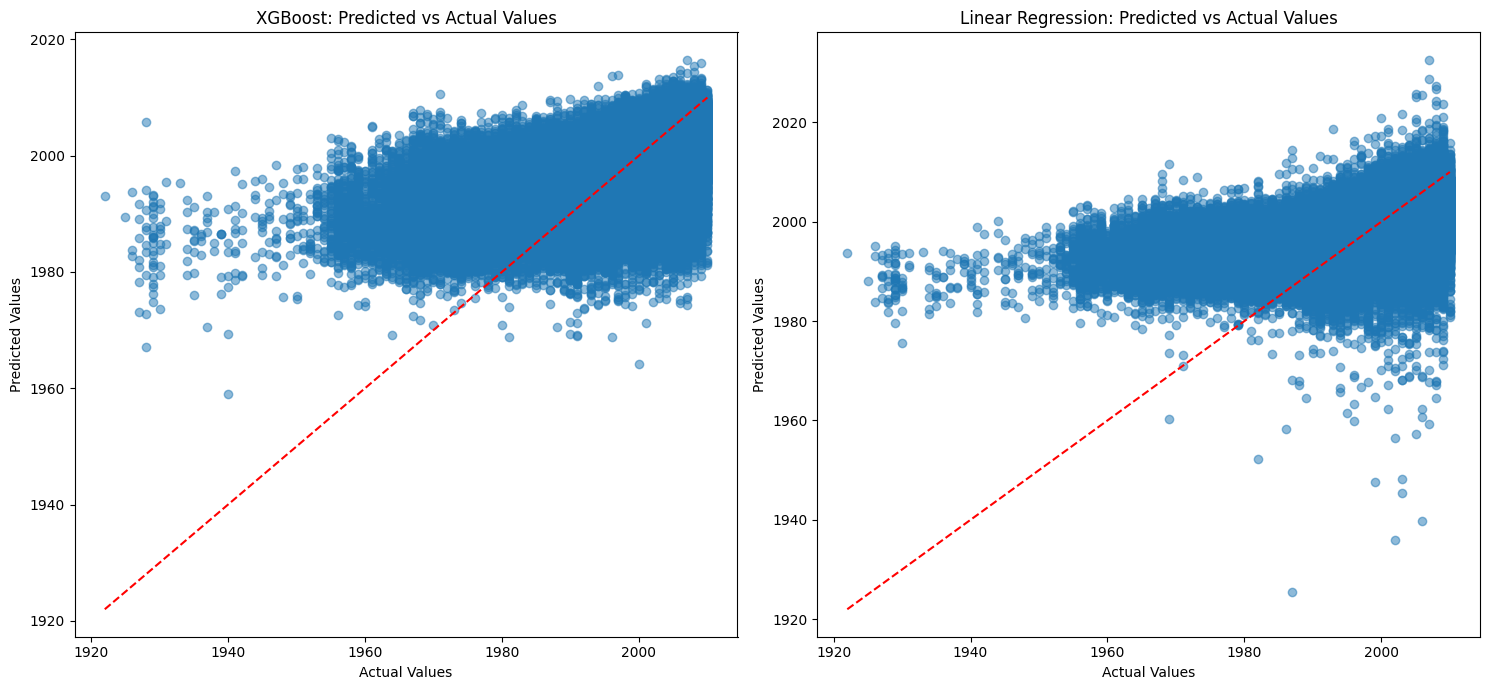

In [26]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test, xgb_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost: Predicted vs Actual Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, linreg_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs Actual Values')

plt.tight_layout()
plt.show()


## Tahap-tahap preprocessing yang dilakukan:
1. Transformasi Yeo-Johnson, untuk menghandle skew negatif dan positif pada dataset.
2. Robust Scaling, untuk scaling sekaligus menghandle outlier pada dataset.
   
### Dataset diexport 'preprocessed_data.csv'
### Training MLP di regression.ipynb